In [63]:
%matplotlib inline

In [93]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [65]:
results = glob.glob(os.path.join('*/*/*.txt'))
columns = ['Device', 'Scheduler', 'Case', 'Mean', 'Std.Dev.', 'Min', 'Median', 'Max']
rows = []
for path in results:
    device, scheduler, case = (path.split('/'))[-3:]
    case, _ = os.path.splitext(case)
    case = case.replace('iogenic', 'long-lived')

    with open(path, 'r') as f:
        for line in f:
            if line.startswith('real'):
                vals = tuple(map(float, line.split()[1:]))
                rows.append((device, scheduler, case) + vals)

df = pd.DataFrame(rows, columns=columns)
df

,Device,Scheduler,Case,Mean,Std.Dev.,Min,Median,Max
0,yoga-900,cfq,long-lived,3.093,0.311,2.807,3.017,3.952
1,yoga-900,cfq,unloaded,2.735,0.018,2.704,2.735,2.774
2,yoga-900,cfq,ionice-long-lived,2.968,0.084,2.827,2.966,3.158
3,yoga-900,cfq,shell-loop,3.047,0.199,2.828,2.974,3.622
4,yoga-900,bfq,long-lived,3.410,0.782,2.869,2.962,5.447
5,yoga-900,bfq,unloaded,2.819,0.018,2.780,2.816,2.850
6,yoga-900,bfq,ionice-long-lived,3.063,0.244,2.873,2.946,3.596
7,yoga-900,bfq,shell-loop,4.425,3.026,2.867,3.011,14.486
8,yoga-900,bfq,ionice-shell-loop,3.155,0.247,2.932,3.026,3.730
9,mission,cfq,long-lived,24.181,0.958,22.833,24.192,26.516


In [81]:
compare_schedulers = pd.pivot_table(df,
                                    index=['Device', 'Case'],
                                    columns=['Scheduler'],
                                    # values=['Mean', 'Std.Dev.'],
                                   )
compare_schedulers

Max            Mean          Median          \
Scheduler                      bfq     cfq     bfq     cfq     bfq     cfq   
Device   Case                                                                
mission  ionice-long-lived  16.222  16.767  13.360  14.335  13.245  14.097   
         ionice-shell-loop  14.044  16.830  12.839  15.216  12.790  15.630   
         long-lived         27.701  26.516  13.642  24.181  13.082  24.192   
         shell-loop         33.802  26.274  13.806  24.254  13.045  24.272   
         unloaded           13.135  18.708  12.627  12.780  12.589  12.376   
yoga-900 ionice-long-lived   3.596   3.158   3.063   2.968   2.946   2.966   
         ionice-shell-loop   3.730     NaN   3.155     NaN   3.026     NaN   
         long-lived          5.447   3.952   3.410   3.093   2.962   3.017   
         shell-loop         14.486   3.622   4.425   3.047   3.011   2.974   
         unloaded            2.850   2.774   2.819   2.735   2.816   2.735   

                               Min         Std.Dev.         
Scheduler                      bfq     cfq      bfq    cfq  
Device   Case                                               
mission  ionice-long-lived  12.991  13.668    0.554  0.657  
         ionice-shell-loop  12.503  13.355    0.296  1.031  
         long-lived         12.569  22.833    2.678  0.958  
         shell-loop         12.538  22.055    3.726  1.228  
         unloaded           12.317  12.067    0.172  1.599  
yoga-900 ionice-long-lived   2.873   2.827    0.244  0.084  
         ionice-shell-loop   2.932     NaN    0.247    NaN  
         long-lived          2.869   2.807    0.782  0.311  
         shell-loop          2.867   2.828    3.026  0.199  
         unloaded            2.780   2.704    0.018  0.018

In [82]:
compare_cases = pd.pivot_table(df,
                               index=['Device', 'Scheduler'],
                               columns=['Case'],
                               # values=['Mean', 'Std.Dev.'],
                              )
compare_cases

Max                                          \
Case               ionice-long-lived ionice-shell-loop long-lived shell-loop   
Device   Scheduler                                                             
mission  bfq                  16.222            14.044     27.701     33.802   
         cfq                  16.767            16.830     26.516     26.274   
yoga-900 bfq                   3.596             3.730      5.447     14.486   
         cfq                   3.158               NaN      3.952      3.622   

                                         Mean                               \
Case               unloaded ionice-long-lived ionice-shell-loop long-lived   
Device   Scheduler                                                           
mission  bfq         13.135            13.360            12.839     13.642   
         cfq         18.708            14.335            15.216     24.181   
yoga-900 bfq          2.850             3.063             3.155      3.410   
         cfq          2.774             2.968               NaN      3.093   

                                         ...                  Min  \
Case               shell-loop unloaded   ...    ionice-long-lived   
Device   Scheduler                       ...                        
mission  bfq           13.806   12.627   ...               12.991   
         cfq           24.254   12.780   ...               13.668   
yoga-900 bfq            4.425    2.819   ...                2.873   
         cfq            3.047    2.735   ...                2.827   

                                                                     \
Case               ionice-shell-loop long-lived shell-loop unloaded   
Device   Scheduler                                                    
mission  bfq                  12.503     12.569     12.538   12.317   
         cfq                  13.355     22.833     22.055   12.067   
yoga-900 bfq                   2.932      2.869      2.867    2.780   
         cfq                     NaN      2.807      2.828    2.704   

                            Std.Dev.                                          \
Case               ionice-long-lived ionice-shell-loop long-lived shell-loop   
Device   Scheduler                                                             
mission  bfq                   0.554             0.296      2.678      3.726   
         cfq                   0.657             1.031      0.958      1.228   
yoga-900 bfq                   0.244             0.247      0.782      3.026   
         cfq                   0.084               NaN      0.311      0.199   

                             
Case               unloaded  
Device   Scheduler           
mission  bfq          0.172  
         cfq          1.599  
yoga-900 bfq          0.018  
         cfq          0.018  

[4 rows x 25 columns]

In [133]:
def show_bars(pivot, measure='Mean'):
    fig, ax = plt.subplots()
    # Using std dev as error bars looks ridiculous because a couple of measurements have some
    # huge outlier that means the std dev is greater than the height above the 'unloaded'
    # baseline.
    #
    # Instead, use the Min and Max as (asymmetric) error bars. A bit weird but I think it actually
    # conveys the distribution better.
    yerr = np.concatenate([(pivot[measure] - pivot.Min).values[:, np.newaxis, :],
                           (pivot.Max - pivot[measure]).values[:, np.newaxis, :]],
                          axis=1)
    yerr = np.swapaxes(yerr, 0, 2)  # ?!?
    pivot[measure].plot.bar(
        # yerr=pivot['Std.Dev.'],
        yerr=yerr,
        ax=ax, rot=90, figsize=(12, 12), title=measure)
    fig.tight_layout()

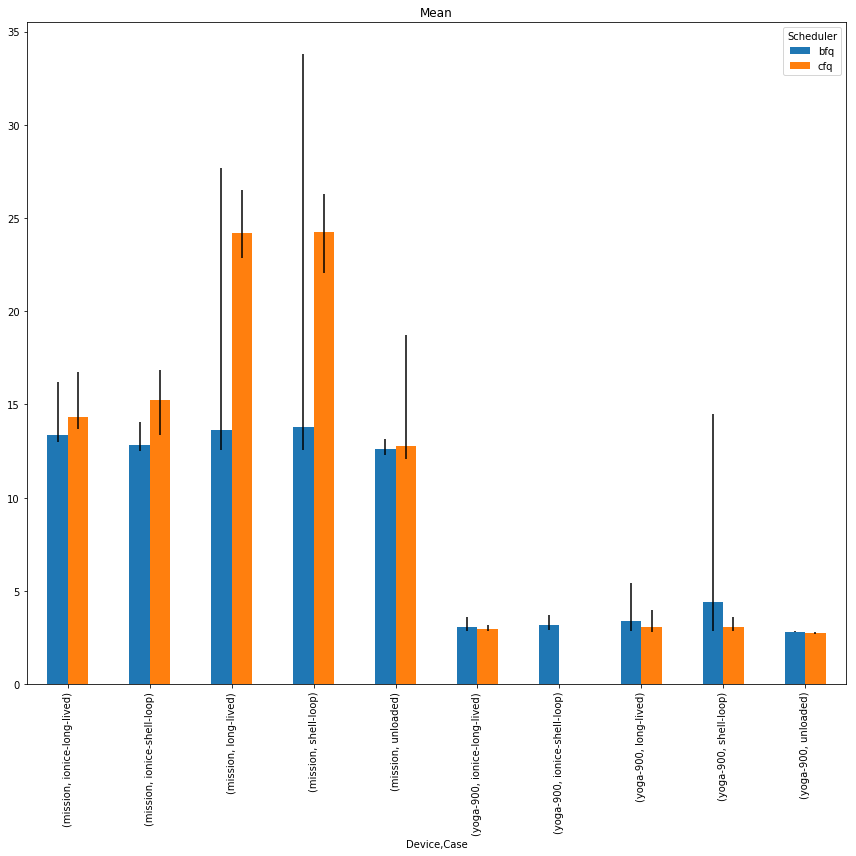

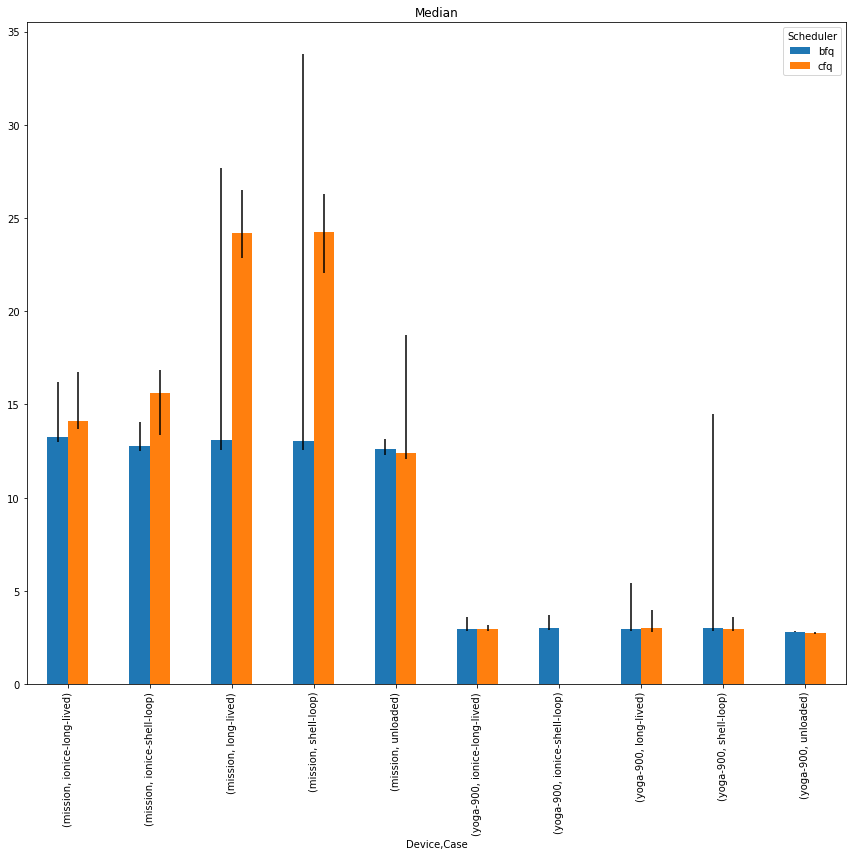

In [136]:
show_bars(compare_schedulers)
show_bars(compare_schedulers, 'Median')

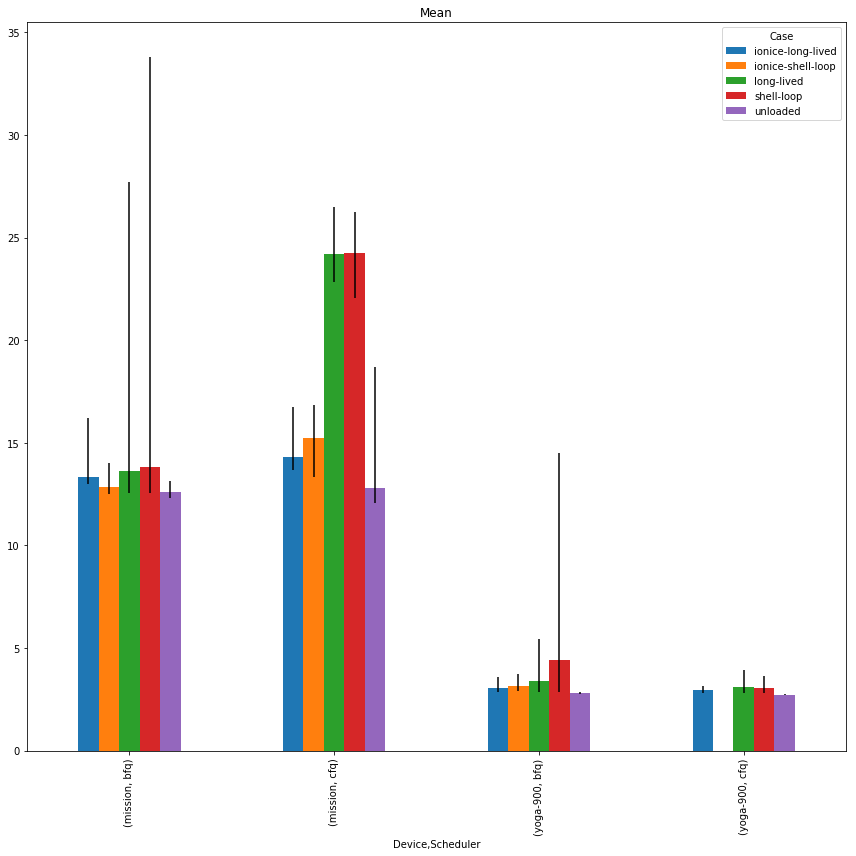

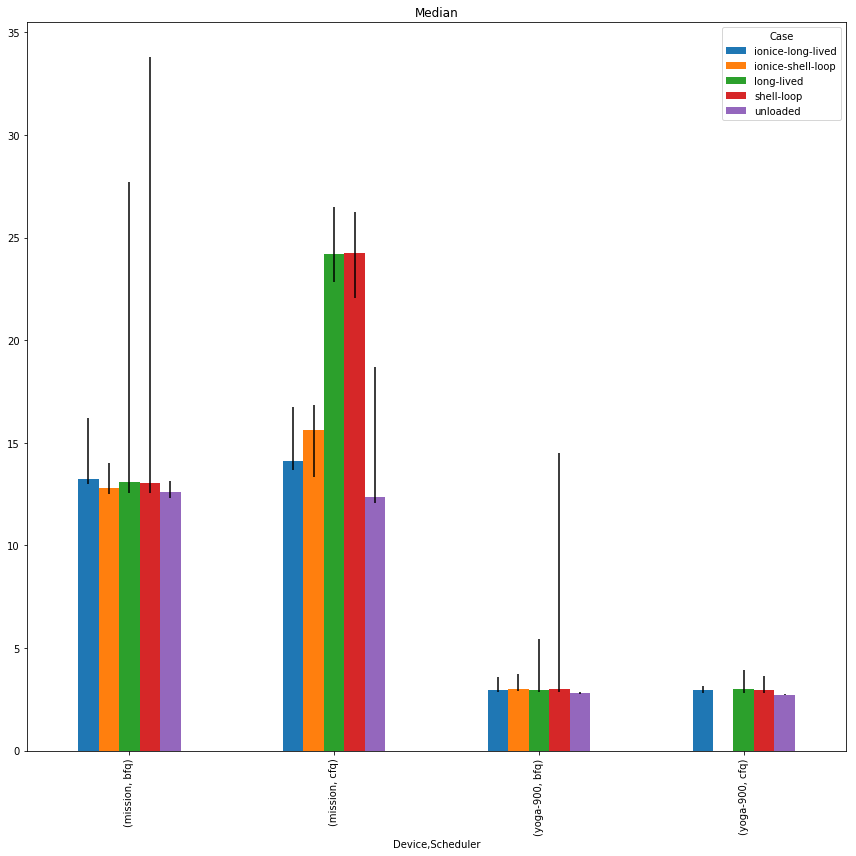

In [137]:
show_bars(compare_cases)
show_bars(compare_cases, 'Median')